# Adult census income

# Using logistic regression + PCA to predict whether a person makes over 50k a year

## Introduction

In economics, personal income refers to an individual's total earnings from wages, investment enterprises, and other ventures. It is the sum of all the incomes received by all the individuals or household during a given period. Personal income is that income which is received by the individuals or households in a country during the year from all sources. In general, it refers to all products and money that you receive [1]

## Importance of personal income

National personal income levels are very closely linked to the Gross Domestic Product (GDP), and they serve as a key indicator on consumer spending, inflationary pressures, the overall economy and markets.

Income statistics serves as an indictor of socioeconomic disparities and inequalities that could affect the economy down the road.

Income statistics also hekps the government on how to give certain benefits with low income earners getting more benefits. For example the last covi-19 stimulus checks sent out by President Biden and the U.S Congress went out to; Single payers who make less than $75000 yearly, head of household who makes less than $112,500 yearly and married couples filing jointly who make less than $150,000 yearly

## Problem statement

Without national ststistics on income , the government will face so many challenges functioning. They need these satistics to know how to distribute benefits to citizens such as pandemic stimulus checks, health care to citizens, housing and other basic living expenses. Having a system that predicts whether a person makes over $50,000yearly gives the government some information or sense of how wealth is distributed in the country and how to sent out benefits to citizens

## Business goal

The goal of this project is to build a system using logistic regression to predict whether a person makes over 50k a year

## Dataset

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)) [2]

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import zipfile

In [2]:
# reading the dataset
zf = zipfile.ZipFile('/Users/mbahc/OneDrive/Desktop/adult data/adult.csv.zip') 
df = pd.read_csv(zf.open('adult.csv'))

## Exploratory analyses

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

No missing data

Eventhough they are no missing values, we have some values written as ?

Lets encode the values '?' as NaN

In [8]:
df[df == '?'] = np.nan

C:\Users\mbahc\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
# Rechecking the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Columns workclass, occupation, native.country all now have missing values

In [11]:
for x in ['workclass', 'occupation', 'native.country']:
    df[x].fillna(df[x].mode()[0], inplace=True)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
#checking for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

No missing values

## Visualization

<Figure size 432x720 with 0 Axes>

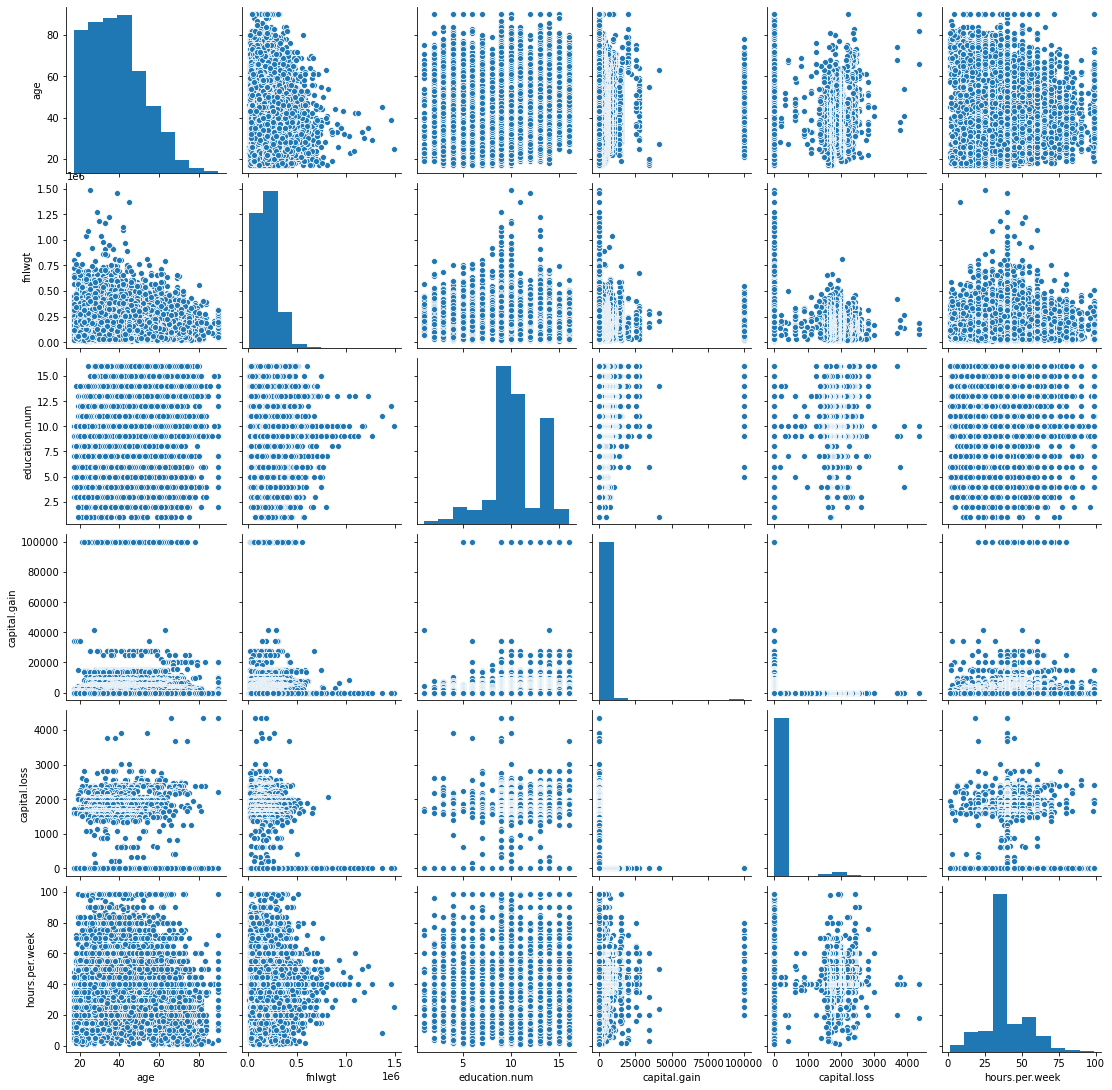

In [14]:
#Visualising all numeric variable
plt.figure(figsize=(6,10))
sns.pairplot(df) 
plt.show()

A pairplot shows a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 

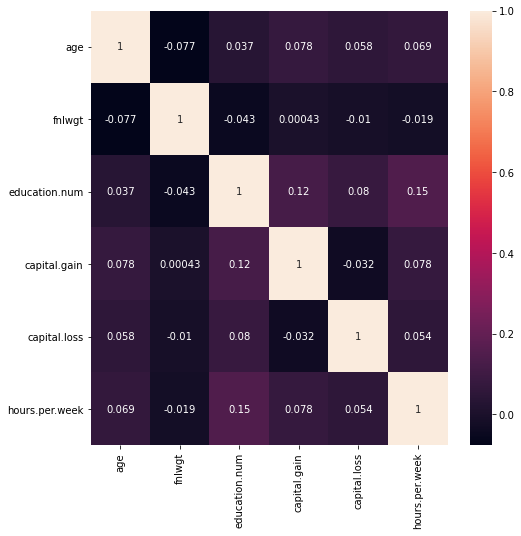

In [15]:
#Find correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),annot=True)

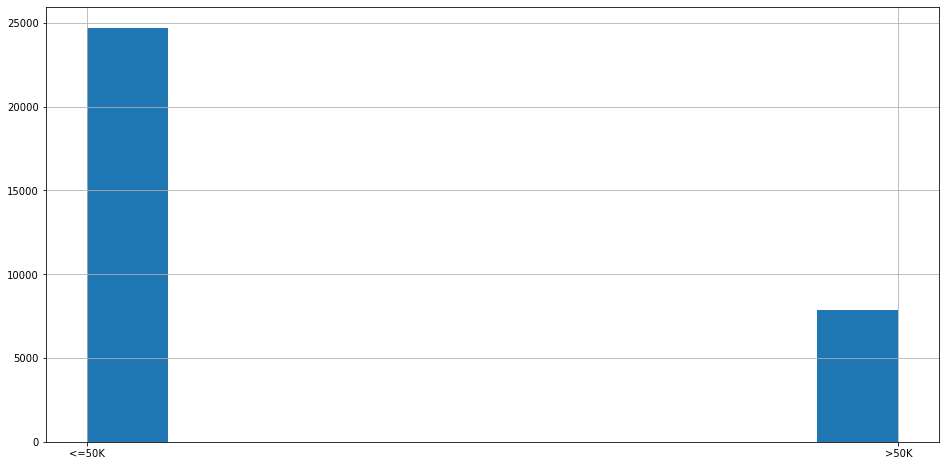

In [16]:
# histogram-income
df['income'].hist(figsize=(16,8))

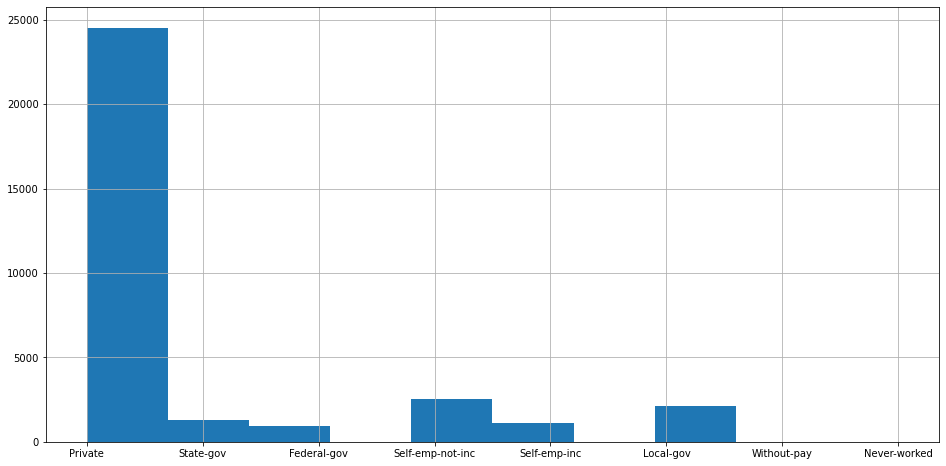

In [17]:
df['workclass'].hist(figsize=(16,8))

## Splitting dataset into train and test dataset

In [18]:
np.random.seed(0)
train_df, test_df = train_test_split(df, train_size = 0.8, random_state = 0 )

In [19]:
test_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
22278,56,Private,274475,9th,5,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
8950,19,Private,237455,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,25,United-States,<=50K
7838,23,Private,125491,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Female,0,0,35,Vietnam,<=50K
16505,37,Federal-gov,48779,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
19140,49,Private,423222,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K


In [20]:
train_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
15282,41,Private,208330,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,51,United-States,<=50K
24870,25,Local-gov,191921,Bachelors,13,Never-married,Craft-repair,Own-child,White,Male,0,0,25,United-States,<=50K
18822,25,Private,180212,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
26404,53,Private,123092,HS-grad,9,Widowed,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7842,24,Private,122272,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Female,0,0,40,United-States,<=50K


In [21]:
train_df.shape, test_df.shape

((26048, 15), (6513, 15))

## Splitting the independent features from the target feature

In [22]:
y_train = train_df.pop('income')
X_train = train_df
y_test = test_df.pop('income')
X_test = test_df

In [23]:
y_train.shape, X_train.shape, y_test.shape, X_test.shape

((26048,), (26048, 14), (6513,), (6513, 14))

## Logistic regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [24]:
### Encoding categorical variables
from sklearn import preprocessing
categorical_variables = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical_variables:
    X_train[feature] = preprocessing.LabelEncoder().fit_transform(X_train[feature])
    X_test[feature] =  preprocessing.LabelEncoder().fit_transform(X_test[feature])

<ipython-input-24-0ccbfbca8619>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = preprocessing.LabelEncoder().fit_transform(X_train[feature])
<ipython-input-24-0ccbfbca8619>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] =  preprocessing.LabelEncoder().fit_transform(X_test[feature])


In [25]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
15282,41,3,208330,15,10,2,11,0,4,1,0,0,51,38
24870,25,1,191921,9,13,4,2,3,4,1,0,0,25,38
18822,25,3,180212,11,9,4,0,4,2,0,0,0,40,38
26404,53,3,123092,11,9,6,6,1,4,0,0,0,40,38
7842,24,3,122272,9,13,4,4,3,4,0,0,0,40,38


## Feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler

Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance). It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation.

The standard scaling is calculated as: 

z = (x - u) / s

In [27]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = train_df.columns)

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = test_df.columns)

In [28]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.177807,-0.086682,0.173244,1.218035,-0.036491,-0.407250,1.229093,-0.898177,0.394225,0.698654,-0.144749,-0.21852,0.851632,0.262277
1,-0.993245,-1.885092,0.018238,-0.336949,1.130745,0.924081,-1.037414,0.971835,0.394225,0.698654,-0.144749,-0.21852,-1.254868,0.262277
2,-0.993245,-0.086682,-0.092370,0.181379,-0.425570,0.924081,-1.541082,1.595172,-1.947837,-1.431324,-0.144749,-0.21852,-0.039580,0.262277
3,1.056095,-0.086682,-0.631948,0.181379,-0.425570,2.255412,-0.030077,-0.274840,0.394225,-1.431324,-0.144749,-0.21852,-0.039580,0.262277
4,-1.066435,-0.086682,-0.639694,-0.336949,1.130745,0.924081,-0.533746,0.971835,0.394225,-1.431324,-0.144749,-0.21852,-0.039580,0.262277


## Model

In [29]:
# applying logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred=logistic_regression.predict(X_test)

In [31]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [32]:
# Accuracy score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
accuracy_score(y_test, y_pred)
recall_score(y_test, y_pred)
precision_score(y_test, y_pred)

0.8215875940426839

### Accuracy score on the test data is 82.16%

## Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [33]:
conf= metrics.confusion_matrix(y_test, y_pred)
conf

array([[4656,  310],
       [ 852,  695]], dtype=int64)

## Cponfusion matrix

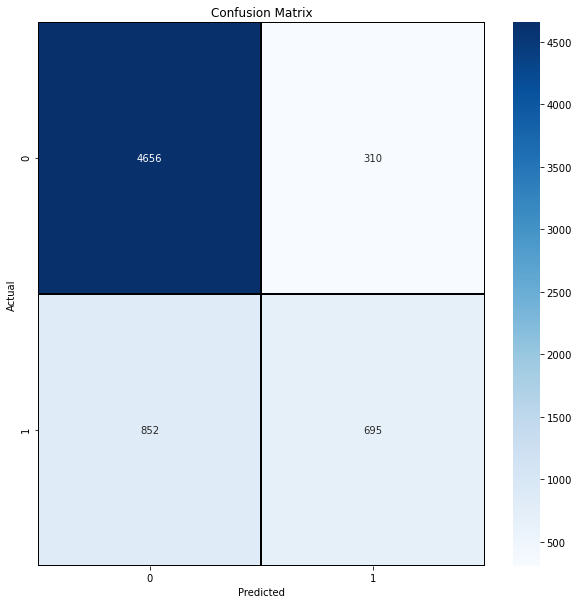

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(conf,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()  

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8215875940426839


## ROC

A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers.

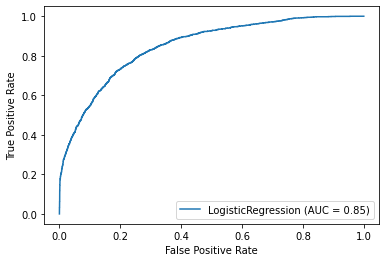

In [36]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logistic_regression, X_test, y_test)

## Logistic Regression with PCA

### Principle Component Analysis
Principal component analysis is a technique used to reduce the dimensionality of a data set. PCA is typically employed prior to implementing a machine learning algorithm because it minimizes the number of variables used to explain the maximum amount of variance for a given data set.

### Explained Variance Ratio
It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

In [37]:
from sklearn.decomposition import PCA
pca = PCA()

In [38]:
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14803823, 0.10143074, 0.08107741, 0.07859831, 0.07441793,
       0.07317622, 0.07015236, 0.06757149, 0.06476383, 0.06127895,
       0.0608518 , 0.04840302, 0.04278992, 0.02744978])

Approximately 97.25% of variance is explained by the first 13 variables.

Only 2.74% of variance is explained by the last variable

We can drop the last variable since it carries just 2.74% of the variance


### Logistic regression with 13 variables

In [39]:
np.random.seed(0)
train_df1, test_df1 = train_test_split(df, train_size = 0.8, random_state = 0 )

In [40]:
y_train = train_df1['income']
y_test = test_df1['income']

In [41]:
X_train=train_df1.drop(['native.country', 'income'], axis=1)
X_test =test_df1.drop(['native.country', 'income'], axis=1)

In [42]:
# encode categoricl variables
categorical_variables = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical_variables:
    X_train[feature] = preprocessing.LabelEncoder().fit_transform(X_train[feature])
    X_test[feature] =  preprocessing.LabelEncoder().fit_transform(X_test[feature])

In [43]:
# feature scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

## Model

In [44]:
# applying logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred=logistic_regression.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [46]:
# Accuracy score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8217411331183786

### Accuracy for logistic regression with the first 13 features is 0.8217

### Importance comments

We can see that the accuracy has been decreased from 0.82116 to 0.8217 after dropping the last feature.

I will take the last two features combined. Approximately 7.024% of variance is explained by them


### Now I will drop the last two features with the least explained variance ratio and train the model with 12 variables

In [47]:
np.random.seed(0)
train_df2, test_df2 = train_test_split(df, train_size = 0.8, random_state = 0 )

In [48]:
y_train = train_df2['income']
y_test = test_df2['income']

In [49]:
X_train=train_df2.drop(['hours.per.week','native.country', 'income'], axis=1)
X_test =test_df2.drop(['hours.per.week','native.country', 'income'], axis=1)

In [50]:
# encode categoricl variables
categorical_variables = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical_variables:
    X_train[feature] = preprocessing.LabelEncoder().fit_transform(X_train[feature])
    X_test[feature] =  preprocessing.LabelEncoder().fit_transform(X_test[feature])

In [51]:
# feature scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

## Model

In [52]:
# applying logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred=logistic_regression.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [54]:
# Accuracy score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8246583755565792

### Accuracy score with the first 12 features is 0.824658

## Comments

The accuracy has been increased to 0.824658 when the model is trained with 12 features

Lastly, I will take the last three features combined. Approximately 11.86% of variance is explained by them

### Now I will drop the last three features with the least explained variance ratio and train the model with 11 variables

In [55]:
np.random.seed(0)
train_df3, test_df3 = train_test_split(df, train_size = 0.8, random_state = 0 )

In [56]:
y_train = train_df2['income']
y_test = test_df2['income']

In [57]:
X_train=train_df3.drop(['capital.loss','hours.per.week','native.country', 'income'], axis=1)
X_test =test_df3.drop(['capital.loss','hours.per.week','native.country', 'income'], axis=1)

In [58]:
# encode categoricl variables
categorical_variables = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical_variables:
    X_train[feature] = preprocessing.LabelEncoder().fit_transform(X_train[feature])
    X_test[feature] =  preprocessing.LabelEncoder().fit_transform(X_test[feature])

In [59]:
# feature scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

## Model

In [60]:
# applying logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred=logistic_regression.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [62]:
# Accuracy score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8211269768155995

### Accuracy score with the first 11 features is 0.821127

### Comments

The accuracy has been decreased to 0.821127 when the model is trained with 11 features

We can see that accuracy has significantly decreased to 0.821127 if I drop the last three features.

## SELECTING THE RIGHT NUMBER OF DIMENSIONS

A better approach is to find the number of dimensions that can explain significantly large portion of the variance.

The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [63]:
np.random.seed(0)
train_df, test_df = train_test_split(df, train_size = 0.8, random_state = 0 )

In [64]:
y_train = train_df.pop('income')
X_train = train_df
y_test = test_df.pop('income')
X_test = test_df

In [65]:
### Encoding categorical variables
from sklearn import preprocessing
categorical_variables = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical_variables:
    X_train[feature] = preprocessing.LabelEncoder().fit_transform(X_train[feature])
    X_test[feature] =  preprocessing.LabelEncoder().fit_transform(X_test[feature])

<ipython-input-65-0ccbfbca8619>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = preprocessing.LabelEncoder().fit_transform(X_train[feature])
<ipython-input-65-0ccbfbca8619>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] =  preprocessing.LabelEncoder().fit_transform(X_test[feature])


In [66]:
# feature scaling
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [67]:
pca = PCA()
pca.fit(X_train)
x = np.cumsum(pca.explained_variance_ratio_) # Return the cumulative sum of the elements along a given axis
dim = np.argmax(x >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


### With right the number of dimensions found, let's now train our model

In [68]:
np.random.seed(0)
train_df5, test_df5 = train_test_split(df, train_size = 0.8, random_state = 0 )

In [69]:
y_train = train_df5['income']
y_test = test_df5['income']

In [70]:
X_train=train_df5.drop(['hours.per.week','native.country', 'income'], axis=1)
X_test =test_df5.drop(['hours.per.week','native.country', 'income'], axis=1)

In [71]:
# encode categoricl variables
categorical_variables = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical_variables:
    X_train[feature] = preprocessing.LabelEncoder().fit_transform(X_train[feature])
    X_test[feature] =  preprocessing.LabelEncoder().fit_transform(X_test[feature])

In [72]:
# feature scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

### Model

In [73]:
# applying logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_pred=logistic_regression.predict(X_test)

In [75]:
# Accuracy score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8246583755565792

### Confusion matrix

In [76]:
conf= metrics.confusion_matrix(y_test, y_pred)
conf

array([[4693,  273],
       [ 869,  678]], dtype=int64)

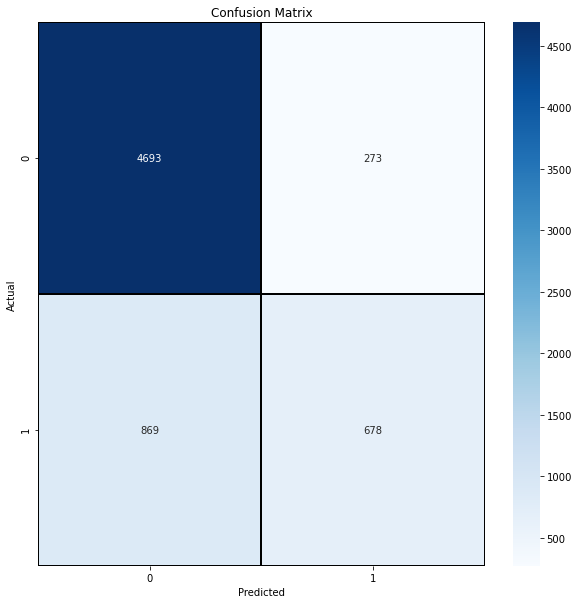

In [77]:
plt.figure(figsize = (10,10))
sns.heatmap(conf,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()  

## True Positive (TP)
True positive represents the value of correct predictions of positives out of actual positive cases. Out of 1547 actual positives, 678 are correctly predicted positive. Thus, the value of true positive is 678.

## False Positive (FP)
It represents the value of incorrect positive predictions. The value represents the number of negatives(out of 4966) which gets falsely predicted a positive. Out of 4966 actual negatives, 273 is falsely predicted as positive. Thus the value of false positive is 273.

## True Negative (TN)
True negative represents the value of correct prediction of negatives out of actual negative cases. Out of 4966 actual negatives , 4693 are corrected predicted as negatives. The value of true negatives is 4693.

## False Negative (FN)
False Negative represents the value of incorrect negative predictions. This value represents the number of actual positives (out of 1547) which gets falsely predicted as negatives. Out of 1547 actual positives, 869 is incorrectly predicted as negatives. Thus the value of False Negative is 869


In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8246583755565792


## ROC

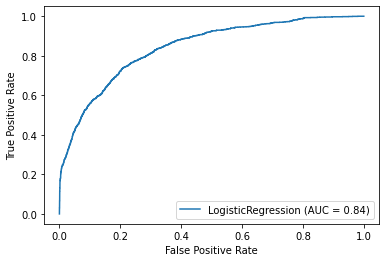

In [81]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logistic_regression, X_test, y_test)

## References

[1]  Wikipedia. (2021, May 7). Personal income. Retrieved from Wikipedia: https://en.wikipedia.org/wiki/Personal_income
        
[2]  Ronny Kohavi, B. B.. Retrieved from United States Census Bureau: https://www.census.gov/en.html